In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [ ]:
# df1 = pd.read_excel("Data/statistic_id785203_students-with-federal-loans-for-higher-education-us-2023-by-repayment-status.xlsx", sheet_name='Data', skiprows=4, usecols=['Unnamed: 1', 'Unnamed: 2'])
# df1.rename(columns={'Unnamed: 1': 'type', 'Unnamed: 2': 'in percent'}, inplace=True)
# df1

จะเห็นได้จากข้อมูลนี้ว่า default rate(หนี้สูญ) = 15% 

In [ ]:
# df2 = pd.read_excel("Data/statistic_id1078714_number-of-student-loan-borrowers-by-balance-us-2023.xlsx", sheet_name='Data', skiprows=4, usecols=['Unnamed: 1', 'Unnamed: 2'])
# df2.rename(columns={'Unnamed: 1': 'range', 'Unnamed: 2': 'loaner in million'}, inplace=True)
# df2

In [ ]:
# df3 = pd.read_excel('Data/student loan in capital.xlsx', sheet_name='Data', skiprows=4, usecols=['Unnamed: 1', 'Unnamed: 2'])
# df3.rename(columns={'Unnamed: 1': 'range', 'Unnamed: 2': 'total loaned in billion u.s. dollar'}, inplace=True)
# df3

# Part 6: สาเหตุที่อาจเป็นเหตุให้เกิดการไม่จ่ายหนี้ กยศ
---


## 1. สถานะของผู้กู้ยืม

In [5]:
df1 = pd.read_excel('https://github.com/purachai-phonwisut/student-loan-analysis/raw/main/Data/%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%88%E0%B8%B3%E0%B8%99%E0%B8%A7%E0%B8%99%E0%B8%9C%E0%B8%B9%E0%B9%89%E0%B8%81%E0%B8%B9%E0%B9%89%E0%B8%A2%E0%B8%B7%E0%B8%A1%E0%B9%81%E0%B8%A2%E0%B8%81%E0%B8%95%E0%B8%B2%E0%B8%A1%E0%B8%AA%E0%B8%96%E0%B8%B2%E0%B8%99%E0%B8%B0.xlsx')
df1

,ลำดับสถานะ,สถานะผู้กู้ยืม,จำนวนผู้กู้ยืม(รายบัญชี),จำนวนเงินกู้ยืม(บาท),จำนวนเงินต้นผิดนัดชำระหนี้(บาท)
0,10,1.อยู่ระหว่างศึกษา ปลอดหนี้,1366838,1.432988e+11,0.000000e+00
1,20,2.อยู่ระหว่างชำระหนี้,3519163,4.518960e+11,9.736006e+10
2,21,2.1ไม่ผิดนัดชำระหนี้,1277319,1.889971e+11,0.000000e+00
3,22,2.2ผิดนัดชำระหนี้,2241844,2.628990e+11,9.736006e+10
4,30,3.ชำระหนี้เสร็จสิ้น,1848558,1.457144e+11,0.000000e+00
5,40,4.เสียชีวิต ทุพพลภาพ,72270,6.391653e+09,0.000000e+00


In [38]:
df1['อัตราส่วนของผู้กู้แต่ละสถานะ'] = (df1['จำนวนเงินกู้ยืม(บาท)'] / df1['จำนวนเงินกู้ยืม(บาท)'].sum()) * 100
df1['อัตราส่วนของผู้กู้แต่ละสถานะ'].map(lambda x: "{:.2f}%".format(x)).reset_index()

,index,อัตราส่วนของผู้กู้แต่ละสถานะ
0,0,11.95%
1,1,37.68%
2,2,15.76%
3,3,21.92%
4,4,12.15%
5,5,0.53%


[Text(0, 0, '11.9496'),
 Text(0, 0, '37.6832'),
 Text(0, 0, '15.7603'),
 Text(0, 0, '21.9229'),
 Text(0, 0, '12.151'),
 Text(0, 0, '0.532994')]

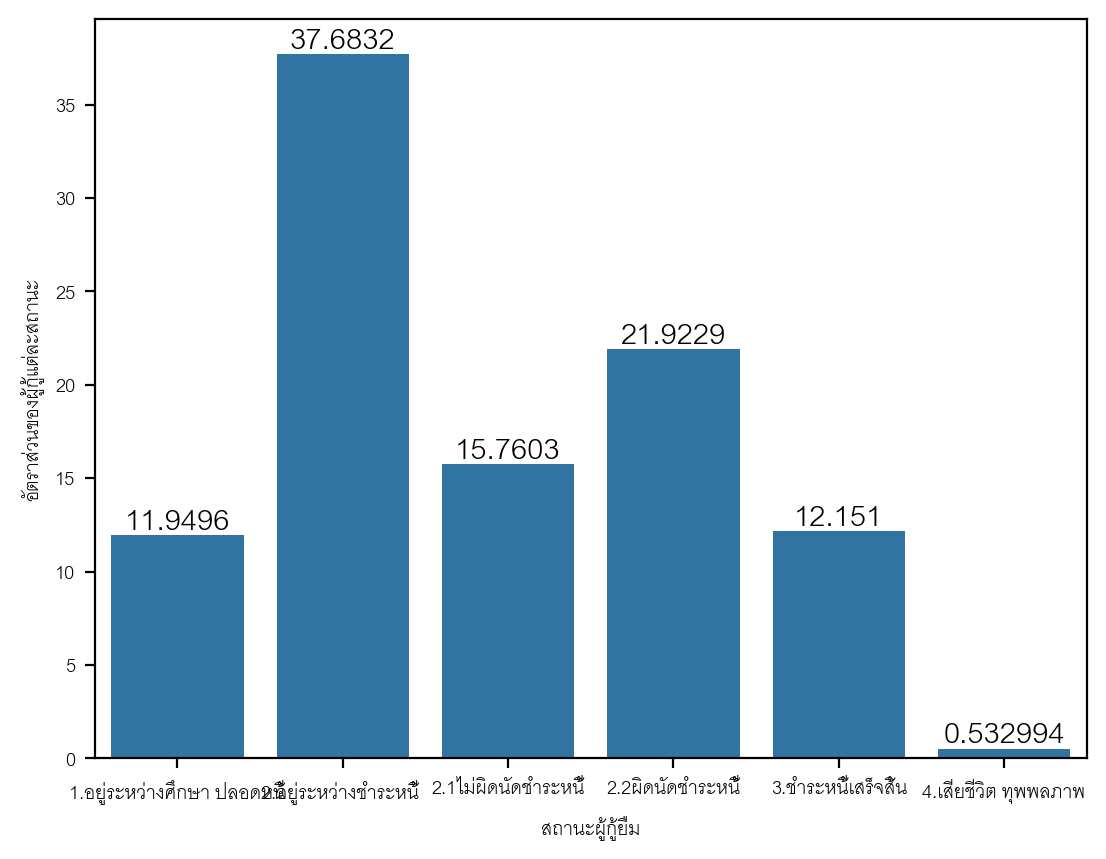

In [39]:
plt.rcParams['font.family'] = 'Cordia new'
g=sns.barplot(data=df1, y="อัตราส่วนของผู้กู้แต่ละสถานะ", x="สถานะผู้กู้ยืม");
g.bar_label(g.containers[0], fontsize=16)

จากกราฟนี้